In [ ]:
!pip install opendatasets

In [ ]:
!pip install seaborn


In [ ]:
!pip install -U scikit-learn scipy matplotlib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.3/36.3 MB 32.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 83.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 10.1 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.10.1
    Uninstalling scipy-1.10.1:
      Successfully uninstalled scipy-1.10.1
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1


In [ ]:

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
sns.set()
import re
import string

#import techila


from sklearn.linear_model import LogisticRegression


#@techila.distributable()

In [ ]:
#import opendatasets as od

In [ ]:
#dataset ="https://www.kaggle.com/datasets/cryptexcode/banfakenews"

In [ ]:
#od.download(dataset)

In [ ]:
#import os




In [ ]:
#data_dir='.\banfakenews'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_real=pd.read_csv('/content/drive/MyDrive/Fake News Dataset/Authentic-48K.csv')

In [ ]:
df_real
#dataset=make_blobs(n_samples=200,n_features=2 ,centers=4,cluster_std=1.6,random_state=50)

,articleID,domain,date,category,headline,content,label
0,1,jagonews24.com,2018-09-19 17:48:18,Education,"হট্টগোল করায় বাকৃবিতে দুইজন বরখাস্ত, ৬ জনকে শোকজ",গত ১৭ সেপ্টেম্বর বাংলাদেশ কৃষি বিশ্ববিদ্যালয়ে ...,1
1,2,jagonews24.com,2018-09-19 17:48:19,National,মালয়েশিয়ায় কর্মী পাঠানোর ব্যবস্থা নেয়ার সুপারিশ,বাংলাদেশের বৃহৎ শ্রমবাজার মালয়েশিয়ায় আবার শ্রম...,1
2,3,jagonews24.com,2018-09-19 17:48:20,National,প্রেমের প্রস্তাবে রাজি না হওয়ায় স্কুলছাত্রীকে ...,নরসিংদীর মনোহরদীতে প্রেমের প্রস্তাবে রাজি না হ...,1
3,4,jagonews24.com,2018-09-19 17:48:21,Crime,মেডিয়েশনই মামলাজট নিরসনের পথ : বিচারপতি আহমেদ ...,সুপ্রিম কোর্টের হাইকোর্ট বিভাগের বিচারপতি আহমে...,1
4,5,jagonews24.com,2018-09-19 17:48:21,National,টকশোতে বক্তব্য দিতে গিয়ে জাপা নেতার মৃত্যু,মাদারীপুর সদরের উপজেলার লেকেরপাড়ে একটি বেসরকার...,1
...,...,...,...,...,...,...,...
48673,61776,banglanews24.com,2018-10-11 16:39:23,Sports,"এনসিএলে তিতলির প্রভাব, সব ম্যাচ ড্র",প্রথমে বাংলাদেশের কাছ দিয়ে যাওয়ার কথা থাকলেও ঘ...,1
48674,61777,banglanews24.com,2018-10-11 16:39:27,International,"কর্ম-বসবাসে সেরা সিঙ্গাপুর, আয়ে সুইজারল্যান্ড",উন্নত জীবনযাপনের জন্য অনেকেই বিদেশে পাড়ি দেন। ...,1
48675,61778,banglanews24.com,2018-10-11 16:39:30,Politics,জয়পুরহাটে জামায়াতের ১৯ নেতাকর্মী আটক,জয়পুরহাট: সরকার বিরোধী গোপন বৈঠকের সময় জয়পুরহা...,1
48676,61779,banglanews24.com,2018-10-11 16:39:32,National,ভ্যানগার্ড পোশাক কারখানাকে জরিমানা,চট্টগ্রাম: পরিবেশ দূষণের দায়ে নগরের আগ্রাবাদ এ...,1


In [ ]:
df_fake=pd.read_csv('/content/drive/MyDrive/Fake News Dataset/Fake-1K.csv')

In [ ]:
df_fake

,articleID,domain,date,category,headline,content,label
0,1,channeldhaka.news,2019-03-14T13:34:14+00:00,International,মুরগির হামলায় শেয়াল নিহত,"বাংলায় একটা প্রবাদ আছে, শেয়ালের কাছে মুরগী বর্...",0
1,2,earki.com,"সেম্বর ১৭, ২০১৮",Miscellaneous,বিটিভিতে যেবার আমি ইন্টারভিউ দিতে গেলাম,"BTV থেকে লোকজন আসছে, ইন্টারভিউ নিবে।চারজনের টি...",0
2,3,earki.com,"২০:৩৯, জানুয়ারি ১৪, ২০১৯",Miscellaneous,বিদেশ থেকে উন্নতমানের বিরোধীদল আমদানি করার পরা...,অদ্ভুত বিরোধীদলহীনতায় ভুগছে সরকার। এ এক অন্যরক...,0
3,4,channeldhaka.news,2018-06-30T15:56:47+00:00,Sports,অবসর নেয়ার ঘোষণা দিলেন মেসি !,রাশিয়া বিশ্বকাপ নকআউট পর্বে ফ্রান্সের সাথে ৪-৩...,0
4,5,motikontho.wordpress.com,2013-03-05T21:55:45+00:00,Miscellaneous,"মাদারফাকার নহে, ব্রাদারফাকার: সাকা | দৈনিক মতি...","নিজস্ব মতিবেদক‘মাদারফাকার নহে, আমি ব্রাদারফাকা...",0
...,...,...,...,...,...,...,...
1294,1303,bengalbeats.com,2019-03-31T21:34:42+00:00,Miscellaneous,রাজশাহীতে স্বামীর হাঁচির আওয়াজে ঘুমের মধ্যেই স...,রাজশাহীর সাহেব বাজার মোড়ে রাতে ঘুমের মধ্যে হাস...,0
1295,1304,bengaliviralnews.com,2018-01-16T15:36:12+00:00,Miscellaneous,IAS ইন্টারভিউ এ মেয়েটিকে জিজ্ঞসা করা হল মেয়েদে...,IAS পরীক্ষায় এমন এমন অবাক করে দেওয়া প্রশ্ন এসে...,0
1296,1305,channeldhaka.news,2018-12-03T18:09:08+00:00,Crime,শাওমি মোবাইল বিস্ফোরণে কলেজছাত্রের মৃত্যু!,শাওমি মোবাইল ফোন বিস্ফোরণ হয়ে স্বপ্নীল মজুমদা...,0
1297,1306,earki.com,"১৭:৩৬, জানুয়ারি ০৭, ২০১৯",Miscellaneous,ফেসবুকে যেভাবে নতুন মন্ত্রীদের অভিনন্দন বার্তা...,আপনাকে নতুন মন্ত্রিসভার সদস্যদের অভিনন্দন জানা...,0


In [ ]:
df_fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1299 entries, 0 to 1298
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   articleID  1299 non-null   int64 
 1   domain     1299 non-null   object
 2   date       1299 non-null   object
 3   category   1299 non-null   object
 4   headline   1299 non-null   object
 5   content    1299 non-null   object
 6   label      1299 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 71.2+ KB


In [ ]:
df_real.head(5)

,articleID,domain,date,category,headline,content,label
0,1,jagonews24.com,2018-09-19 17:48:18,Education,"হট্টগোল করায় বাকৃবিতে দুইজন বরখাস্ত, ৬ জনকে শোকজ",গত ১৭ সেপ্টেম্বর বাংলাদেশ কৃষি বিশ্ববিদ্যালয়ে ...,1
1,2,jagonews24.com,2018-09-19 17:48:19,National,মালয়েশিয়ায় কর্মী পাঠানোর ব্যবস্থা নেয়ার সুপারিশ,বাংলাদেশের বৃহৎ শ্রমবাজার মালয়েশিয়ায় আবার শ্রম...,1
2,3,jagonews24.com,2018-09-19 17:48:20,National,প্রেমের প্রস্তাবে রাজি না হওয়ায় স্কুলছাত্রীকে ...,নরসিংদীর মনোহরদীতে প্রেমের প্রস্তাবে রাজি না হ...,1
3,4,jagonews24.com,2018-09-19 17:48:21,Crime,মেডিয়েশনই মামলাজট নিরসনের পথ : বিচারপতি আহমেদ ...,সুপ্রিম কোর্টের হাইকোর্ট বিভাগের বিচারপতি আহমে...,1
4,5,jagonews24.com,2018-09-19 17:48:21,National,টকশোতে বক্তব্য দিতে গিয়ে জাপা নেতার মৃত্যু,মাদারীপুর সদরের উপজেলার লেকেরপাড়ে একটি বেসরকার...,1


In [ ]:
df_fake.head(5)

,articleID,domain,date,category,headline,content,label
0,1,channeldhaka.news,2019-03-14T13:34:14+00:00,International,মুরগির হামলায় শেয়াল নিহত,"বাংলায় একটা প্রবাদ আছে, শেয়ালের কাছে মুরগী বর্...",0
1,2,earki.com,"সেম্বর ১৭, ২০১৮",Miscellaneous,বিটিভিতে যেবার আমি ইন্টারভিউ দিতে গেলাম,"BTV থেকে লোকজন আসছে, ইন্টারভিউ নিবে।চারজনের টি...",0
2,3,earki.com,"২০:৩৯, জানুয়ারি ১৪, ২০১৯",Miscellaneous,বিদেশ থেকে উন্নতমানের বিরোধীদল আমদানি করার পরা...,অদ্ভুত বিরোধীদলহীনতায় ভুগছে সরকার। এ এক অন্যরক...,0
3,4,channeldhaka.news,2018-06-30T15:56:47+00:00,Sports,অবসর নেয়ার ঘোষণা দিলেন মেসি !,রাশিয়া বিশ্বকাপ নকআউট পর্বে ফ্রান্সের সাথে ৪-৩...,0
4,5,motikontho.wordpress.com,2013-03-05T21:55:45+00:00,Miscellaneous,"মাদারফাকার নহে, ব্রাদারফাকার: সাকা | দৈনিক মতি...","নিজস্ব মতিবেদক‘মাদারফাকার নহে, আমি ব্রাদারফাকা...",0


In [ ]:
df_real.shape

(48678, 7)

In [ ]:
df_fake.shape

(1299, 7)

# Removing Last 10 rows from the dataset for manual testing

In [ ]:



df_fake_manual_testing = df_fake.tail(10)
for i in range(1298,1289,-1):
    df_fake.drop([i],axis=0,inplace=True)






In [ ]:

  df_fake.shape

(1290, 7)

In [ ]:
 df_real_manual_testing = df_real.tail(10)
for i in range(48677,48668,-1):
    df_real.drop([i],axis=0,inplace=True)

In [ ]:
  df_real.shape

(48669, 7)

Text(0, 0.5, 'Proportion of News Contents')

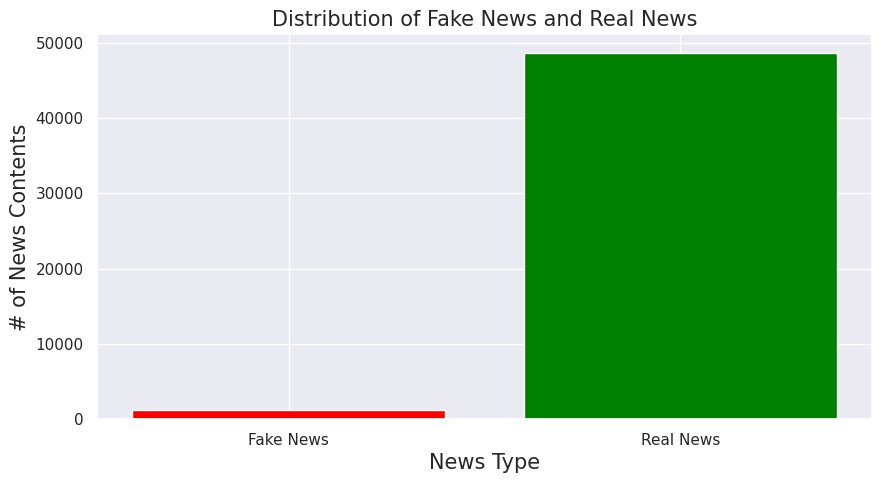

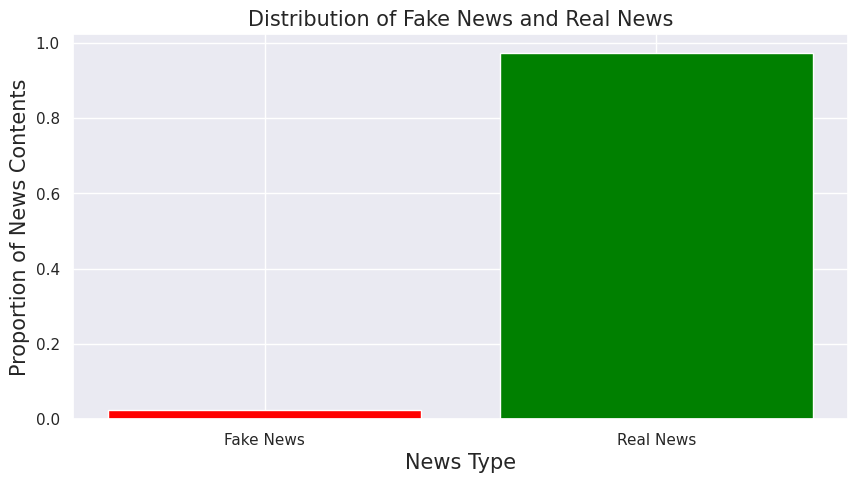

In [ ]:
plt.figure(figsize=(10,5))
plt.bar('Fake News',len(df_fake),color='red')
plt.bar('Real News',len(df_real),color='green')
plt.title('Distribution of Fake News and Real News',size=15)
plt.xlabel('News Type',size=15)
plt.ylabel('# of News Contents',size=15)


total_len = len(df_fake)+len(df_real)
plt.figure(figsize=(10,5))
plt.bar('Fake News',len(df_fake)/total_len ,color='red')
plt.bar('Real News',len(df_real)/total_len ,color='green')
plt.title('Distribution of Fake News and Real News',size=15)
plt.xlabel('News Type',size=15)
plt.ylabel('Proportion of News Contents',size=15)

In [ ]:
df_fake_manual_testing["class"]=0
df_real_manual_testing["class"]=1


<ipython-input-20-d1c93b08d4dd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fake_manual_testing["class"]=0
<ipython-input-20-d1c93b08d4dd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_real_manual_testing["class"]=1


In [ ]:
df_fake_manual_testing.head(10)

,articleID,domain,date,category,headline,content,label,class
1289,1298,motikontho.wordpress.com,2014-06-24T18:29:25+00:00,Miscellaneous,"জেলে খাই বেহেস্তি খানা, ট্রাইবুনালে যাওয়া মানা...",কারাগার মতিবেদকঢাকা কেন্দ্রীয় কারাগারে উচ্চ রক...,0,0
1290,1299,earki.com,"েম্বর ২৫, ২০১৮",Miscellaneous,এবার মশার বিরুদ্ধে গর্জে উঠলো ছাত্রলীগের কামান,সম্প্রতি ঢাকা বিশ্ববিদ্যালয় প্রাঙ্গণে ছাত্রলীগ...,0,0
1291,1300,earki.com,"্টোবর ২৭, ২০১৮",Sports,কুমার সাঙ্গাকারার তিনটি 'রিয়াল লাইফ eআরকি',সদাহাস্য ক্রিকেটার কুমার সাঙ্গাকারা ক্যারিয়ারজ...,0,0
1292,1301,bengalbeats.com,2019-02-17T13:47:16+00:00,Miscellaneous,যানজটে বিশ্বে ঢাকা প্রথম স্থান অর্জন করাতে মির...,যানজটের দিক দিয়ে এখন বাংলাদেশের রাজধানী ঢাকার ...,0,0
1293,1302,earki.com,"২০:২৩, জানুয়ারি ০৩, ২০১৯",Miscellaneous,যে ১০টি কারণে মুখ বন্ধ রাখাই ভালো,"অনেকেই ইদানিং অভিযোগ করছেন, তারা মুখ খুলতে পার...",0,0
1294,1303,bengalbeats.com,2019-03-31T21:34:42+00:00,Miscellaneous,রাজশাহীতে স্বামীর হাঁচির আওয়াজে ঘুমের মধ্যেই স...,রাজশাহীর সাহেব বাজার মোড়ে রাতে ঘুমের মধ্যে হাস...,0,0
1295,1304,bengaliviralnews.com,2018-01-16T15:36:12+00:00,Miscellaneous,IAS ইন্টারভিউ এ মেয়েটিকে জিজ্ঞসা করা হল মেয়েদে...,IAS পরীক্ষায় এমন এমন অবাক করে দেওয়া প্রশ্ন এসে...,0,0
1296,1305,channeldhaka.news,2018-12-03T18:09:08+00:00,Crime,শাওমি মোবাইল বিস্ফোরণে কলেজছাত্রের মৃত্যু!,শাওমি মোবাইল ফোন বিস্ফোরণ হয়ে স্বপ্নীল মজুমদা...,0,0
1297,1306,earki.com,"১৭:৩৬, জানুয়ারি ০৭, ২০১৯",Miscellaneous,ফেসবুকে যেভাবে নতুন মন্ত্রীদের অভিনন্দন বার্তা...,আপনাকে নতুন মন্ত্রিসভার সদস্যদের অভিনন্দন জানা...,0,0
1298,1307,channeldhaka.news,2019-03-09T23:00:05+00:00,International,মাঝ আকাশে পর্ন দেখার অভিযোগে পাইলট আটক!,বিমান যখন আকাশে তখন আর কোনও দিকে খেয়াল না রেখ...,0,0


In [ ]:
df_real_manual_testing.head(10)

,articleID,domain,date,category,headline,content,label,class
48668,61771,banglanews24.com,2018-10-11 16:39:10,International,নিকি প্রচুর অর্থ কামাতেই চলে যাচ্ছেন: ট্রাম্প,ঢাকা: জাতিসংঘে নিযুক্ত মার্কিন রাষ্ট্রদূত নিকি...,1,1
48669,61772,banglanews24.com,2018-10-11 16:39:13,Sports,বিস্মৃতি ভুলে সামনে তাকাতে চাইছেন যুবা দলপতি,ঢাকা: ঘরের মাঠে এশিয়া কাপ। কিন্তু ফাইনালে খেলা...,1,1
48670,61773,banglanews24.com,2018-10-11 16:39:16,International,৫ হাজার নিখোঁজ রেখেই ইন্দোনেশিয়ায় উদ্ধার অভিযা...,ভূমিকম্প-সুনামিতে বিধ্বস্ত দক্ষিণ পূর্ব এশিয়ার...,1,1
48671,61774,banglanews24.com,2018-10-11 16:39:18,Politics,তারেককে সাজা দেয়ার প্রতিবাদে ময়মনসিংহে বিএনপি’...,ময়মনসিংহ: ২১ আগস্ট গ্রেনেড হামলা মামলার রায়ে ব...,1,1
48672,61775,banglanews24.com,2018-10-11 16:39:21,National,২০ জেলায় ৩৩ উন্নয়ন কাজের উদ্বোধন,ঢাকা: সারাদেশের ২০ জেলায় ৩৩টি উন্নয়ন প্রকল্পের...,1,1
48673,61776,banglanews24.com,2018-10-11 16:39:23,Sports,"এনসিএলে তিতলির প্রভাব, সব ম্যাচ ড্র",প্রথমে বাংলাদেশের কাছ দিয়ে যাওয়ার কথা থাকলেও ঘ...,1,1
48674,61777,banglanews24.com,2018-10-11 16:39:27,International,"কর্ম-বসবাসে সেরা সিঙ্গাপুর, আয়ে সুইজারল্যান্ড",উন্নত জীবনযাপনের জন্য অনেকেই বিদেশে পাড়ি দেন। ...,1,1
48675,61778,banglanews24.com,2018-10-11 16:39:30,Politics,জয়পুরহাটে জামায়াতের ১৯ নেতাকর্মী আটক,জয়পুরহাট: সরকার বিরোধী গোপন বৈঠকের সময় জয়পুরহা...,1,1
48676,61779,banglanews24.com,2018-10-11 16:39:32,National,ভ্যানগার্ড পোশাক কারখানাকে জরিমানা,চট্টগ্রাম: পরিবেশ দূষণের দায়ে নগরের আগ্রাবাদ এ...,1,1
48677,61780,banglanews24.com,2018-10-11 16:39:36,National,উল্লাপাড়ায় ভেজাল সার-কীটনাশক তৈরির কারখানা সিল...,সিরাজগঞ্জ: সিরাজগঞ্জের উল্লাপাড়ায় অভিযান চালিয়...,1,1


# Merging the main fake and real dataframe

In [ ]:
df_merge =pd.concat([df_fake,df_real],axis=0)
df_merge.head(10)


,articleID,domain,date,category,headline,content,label
0,1,channeldhaka.news,2019-03-14T13:34:14+00:00,International,মুরগির হামলায় শেয়াল নিহত,"বাংলায় একটা প্রবাদ আছে, শেয়ালের কাছে মুরগী বর্...",0
1,2,earki.com,"সেম্বর ১৭, ২০১৮",Miscellaneous,বিটিভিতে যেবার আমি ইন্টারভিউ দিতে গেলাম,"BTV থেকে লোকজন আসছে, ইন্টারভিউ নিবে।চারজনের টি...",0
2,3,earki.com,"২০:৩৯, জানুয়ারি ১৪, ২০১৯",Miscellaneous,বিদেশ থেকে উন্নতমানের বিরোধীদল আমদানি করার পরা...,অদ্ভুত বিরোধীদলহীনতায় ভুগছে সরকার। এ এক অন্যরক...,0
3,4,channeldhaka.news,2018-06-30T15:56:47+00:00,Sports,অবসর নেয়ার ঘোষণা দিলেন মেসি !,রাশিয়া বিশ্বকাপ নকআউট পর্বে ফ্রান্সের সাথে ৪-৩...,0
4,5,motikontho.wordpress.com,2013-03-05T21:55:45+00:00,Miscellaneous,"মাদারফাকার নহে, ব্রাদারফাকার: সাকা | দৈনিক মতি...","নিজস্ব মতিবেদক‘মাদারফাকার নহে, আমি ব্রাদারফাকা...",0
5,6,channeldhaka.news,2018-12-24T18:17:50+00:00,Miscellaneous,বিয়ের পিড়িতে বসছেন মিয়া খলিফা ! ছেলে কুমিল্লার,বিয়ের সানাই বাজতে চলেছে শীঘ্রই ! সব জল্পনা কল...,0
6,7,earki.com,2019-03-14T02:33:32+00:00,Miscellaneous,জুম্মার নামাজে সবচেয়ে বেশি মসজিদে যায় নোয়াখ...,"এক গবেষণা থেকে জানা গেছে, বাংলাদেশের অন্যান্য ...",0
7,8,motikontho.wordpress.com,2011-06-19T07:12:21+00:00,Miscellaneous,প্রধানমন্ত্রীর প্রশ্ন: আমনে আমাত্তে বড় দেশপ্রে...,নিজস্ব মতিবেদকতেল-গ্যাস-খনিজ সম্পদ ও বিদ্যুৎ-ব...,0
8,10,bengaliviralnews.com,2018-01-03T17:21:14+00:00,Miscellaneous,জানেন শিব ঠাকুরের বাবা কে ? জেনে নিন তাহলে... -,তেত্রিশ কোটি দেবতার মধ্যে এক-একজন এক-এক বেশে এ...,0
9,11,motikontho.wordpress.com,2015-02-22T14:45:30+00:00,Miscellaneous,মেডামের দুয়ায় সমস্যা আছে: মিছবাউল | দৈনিক মতিকণ্ঠ,ক্রীড়া মতিবেদকচলমান বিশ্বকাপ কৃকেটে পাকিস্তানে...,0


In [ ]:
df_merge.columns

Index(['articleID', 'domain', 'date', 'category', 'headline', 'content',
       'label'],
      dtype='object')

# Drop all other colums except content and level

In [ ]:


#df=df_merge.drop(["domain"],axis=1)
#df=df_merge.drop(["date"],axis=1)
#df=df_merge.drop(["category"],axis=1)
df=df_merge.drop(["articleID","headline","domain","date","category"],axis=1)

df.isnull().sum()


content    0
label      0
dtype: int64

In [ ]:
#df=df_merge.drop(["articleID","domain","date","category"],axis=1)

In [ ]:
#df=df_merge.drop(["articleID",],axis=1)

In [ ]:
df=df.sample(frac = 1)

In [ ]:
df.head(10)

,content,label
162,সিঙ্গাপুরভিত্তিক গবেষণা প্রতিষ্ঠান ‘দ্য স্টাটি...,0
45032,নভেম্বরে মেয়েদের টি-টুয়েন্টি বিশ্বকাপের জন্য দ...,1
33233,যুক্তরাষ্ট্র কখনোই ভয় পেয়ে পিছিয়ে যাবে না বলে ...,1
28930,৮ সেপ্টেম্বর ছিল আন্তর্জাতিক সাংবাদিক সংহতি দি...,1
31522,তরুণ প্রজন্মের পছন্দের আন্তর্জাতিক স্মার্টফোন ...,1
24192,ডিজিটাল নিরাপত্তা আইন নিয়ে সম্পাদক পরিষদের আপত...,1
48003,বঙ্গোপসাগরে সৃষ্ট ঘূর্ণিঝড় তিতলি ভারতের উপকূলী...,1
30257,"দালালদের প্রলভনে সুখের আশা, দাদন ব্যবসায়ীদের চ...",1
29635,দক্ষিণ চীন সাগরে চীন ও যুক্তরাষ্ট্রের দুইটি যু...,1
37161,চিকিৎসার জন্য কারাবন্দি খালেদা জিয়াকে বঙ্গবন্ধ...,1


In [ ]:
df.reset_index(inplace=True)
df.drop(["index"],axis=1,inplace = True)

In [ ]:
df.columns


Index(['content', 'label'], dtype='object')

In [ ]:
df.head()

,content,label
0,সিঙ্গাপুরভিত্তিক গবেষণা প্রতিষ্ঠান ‘দ্য স্টাটি...,0
1,নভেম্বরে মেয়েদের টি-টুয়েন্টি বিশ্বকাপের জন্য দ...,1
2,যুক্তরাষ্ট্র কখনোই ভয় পেয়ে পিছিয়ে যাবে না বলে ...,1
3,৮ সেপ্টেম্বর ছিল আন্তর্জাতিক সাংবাদিক সংহতি দি...,1
4,তরুণ প্রজন্মের পছন্দের আন্তর্জাতিক স্মার্টফোন ...,1


# creating a function to convert the text in lowercase ,remove the extra space,special character ,ulr and links

In [ ]:
def wordopt(content):
    content = content.lower()
    content = re.sub('\[.*?\]','',content)
    content = re.sub("\\W"," ",content)
    content = re.sub('http?://\S+|WWW\.\S+', '',content)
    content = re.sub('<.*?>+','',content)
    content = re.sub('[%s]' %re.escape(string.punctuation),' ',content)
    content = re.sub('\n','',content)
    content = re.sub('\W*\d\W*', '',content)
    return content



In [ ]:
df["content"]=df["content"].apply(wordopt)

In [ ]:
# Defining Independent and dependent Variable
x = df["content"]
y = df["label"]

In [ ]:
#Splitting our data into train and test dataset
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size = 0.3, random_state  = 365)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert text to vectors

In [ ]:
#vectorization = TfidfVectorizer()
#xv_train = vectorization.fit_transform (x_train)
#xv_test = vectorization.transform (x_test)

from sklearn.feature_extraction.text import TfidfVectorizer
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

In [ ]:
#LR = LogisticRegression()
#LR.fit(xv_train,y_train)


In [ ]:
#pred_lr=LR.predict(xv_test)

In [ ]:
#LR.score(xv_test,y_test)

In [ ]:
#print (classification_report(y_test,pred_lr))

# Decision Tree Classification

In [ ]:
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm


In [ ]:
DT = DecisionTreeClassifier()
DT.fit(xv_train,y_train)

DecisionTreeClassifier()

In [ ]:
pred_dt=DT.predict(xv_test)

In [ ]:
DT.score(xv_test,y_test)

0.9769815852682145

In [ ]:
print (classification_report(y_test,pred_dt))

              precision    recall  f1-score   support

           0       0.58      0.49      0.53       400
           1       0.99      0.99      0.99     14588

    accuracy                           0.98     14988
   macro avg       0.78      0.74      0.76     14988
weighted avg       0.98      0.98      0.98     14988



In [ ]:
from sklearn import svm  #for Support Vector Machine (SVM) Algorithm
from sklearn.neighbors import KNeighborsClassifier  # for K nearest neighbours
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# GradientBoostingClassifier

In [ ]:
#GBC = GradientBoostingClassifier( random_state = 0)
#GBC.fit(xv_train,y_train)

In [ ]:
#GradientBoostingClassifier( random_state = 0)

In [ ]:
#pred_gbc = GBC.predict(xv_test)

In [ ]:
#GBC.score(xv_test,y_test)

In [ ]:
#print (classification_report(y_test,pred_gbc))

# Random Forest Classifier

In [ ]:
RFC = RandomForestClassifier( random_state = 0)
RFC.fit(xv_train,y_train)

RandomForestClassifier(random_state=0)

In [ ]:
RandomForestClassifier( random_state = 0 )

RandomForestClassifier(random_state=0)

In [ ]:
pred_rfc = RFC.predict(xv_test)

In [ ]:
RFC.score(xv_test,y_test)

0.9784494262076328

In [ ]:
print (classification_report(y_test,pred_rfc))

              precision    recall  f1-score   support

           0       0.99      0.20      0.33       400
           1       0.98      1.00      0.99     14588

    accuracy                           0.98     14988
   macro avg       0.98      0.60      0.66     14988
weighted avg       0.98      0.98      0.97     14988



# kNN

In [ ]:


#KNN= KNeighborsClassifier ()
#KNN.fit(xv_train,y_train)



In [ ]:
#pred_knn = KNN.predict(xv_test)

In [ ]:
#KNN.score(xv_test,y_test)

In [ ]:
#print (classification_report(y_test,pred_knn))

# Support Vector Machine

In [ ]:
SV =  svm.SVC()
SV.fit(xv_train, y_train)


SVC()

In [ ]:
pred_sv = SV.predict(xv_test)

In [ ]:
SV.score(xv_test, y_test)

0.9824526287696824

In [ ]:
print (classification_report(y_test,pred_sv))

              precision    recall  f1-score   support

           0       0.99      0.35      0.51       400
           1       0.98      1.00      0.99     14588

    accuracy                           0.98     14988
   macro avg       0.98      0.67      0.75     14988
weighted avg       0.98      0.98      0.98     14988



# Model Testing with manual Entry

In [ ]:
def output_lable(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Real News"

def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt)
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
 #   pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
 #   pred_GBC = GBC.predict(new_xv_test)
    pred_RFC = RFC.predict(new_xv_test)
    pred_SV = SV.predict(new_xv_test)
  #  pred_KNN =KNN.predict(new_xv_test)

    return print("\n \nDT Prediction: {} \nRFC Prediction: {} \nSV Prediction: {} \n\n ".format( output_lable(pred_DT[0]),output_lable(pred_RFC[0]),output_lable(pred_SV[0]) ))


In [ ]:
news = str(input())
manual_testing(news)

news = str(input())
manual_testing(news)

news = str(input())
manual_testing(news)

news = str(input())
manual_testing(news)

news = str(input())
manual_testing(news)